# Exam 1

Start from the backjack classes developed in class. 

In [19]:
from blackjack import *

In [8]:
def play_a_round(n_hands=50):
    my_game=Game()
    my_game.level=Game.ERROR

    my_game.add_player(Strategy_1_Player("Dummy player",100))
    my_game.add_player(DealerLikePlayer("Stays on 13",100,13))
    my_game.add_player(DealerLikePlayer("Stays on 14",100,14))
    my_game.add_player(DealerLikePlayer("Stays on 15",100,15))
    my_game.add_player(DealerLikePlayer("Stays on 16",100,16))
    my_game.add_player(DealerLikePlayer("Stays on 17",100,17))
    my_game.add_player(DealerLikePlayer("Stays on 18",100,18))
    my_game.add_player(DealerLikePlayer("Stays on 19",100,19))
    my_game.add_player(DealerLikePlayer("Stays on 20",100,20))
    
    my_game.play_game(n_hands)
    
    return [player.chips() for player in my_game.all_players()]
    

In [11]:
def play_many_rounds(n_rounds=100,n_hands=50):
    results = list()
    
    for i_round in range(n_rounds):
        results.append(play_a_round(n_hands))
        
    return results

In [12]:
results= play_many_rounds(1000)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
res = np.array(results)
res = res [:,:-1]

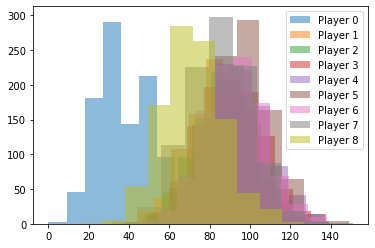

In [15]:
for i in range(res.shape[1]):
    plt.hist(res[:,i],label="Player "+str(i),alpha=0.5)
    
plt.legend()
plt.show()

In [16]:
m=np.mean(res,axis=0)

In [17]:
s=np.std(res,axis=0)

<ErrorbarContainer object of 3 artists>

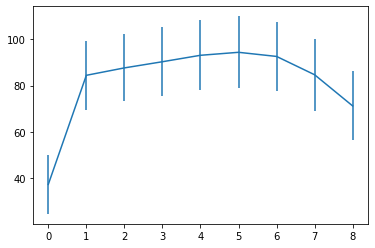

In [18]:
plt.errorbar(range(len(m)),m,s)

## Questions

1. Implement the following boolean functions in the `Card` class:
    * `card_1.same_suit_as(card_2)`
    * `card_1.same_value_as(card_2)`
    * `card_1.same_numerical_value_as(card_2)`
    * `card_1 == card_2`

2. Create a base class for `CardFilterFunction` with a virtual `__call__(self,card)` method. Implement the following derived classes, where the instance have the following behavior:
    * `f = CheckSuit(suit)`: `f(card)` returns boolean testing if `card` same suit as `suit`.
    * `f = CheckValue(value)`: `f(card)` returns boolean testing if `card` same value as `value`.
    * `f = CheckNumericalValue(value)`: `f(card)` returns boolean testing if `card` same numerical value as `value`.

3. Implement the following functions in `Deck` class:
    * `deck_1.n_cards()`: returns number of cards in the deck.
    * `deck_2 = deck_1.copy()`: returns a new deck that is a copy of `deck_1`.
    * `deck_2 = deck_1.filter(filter_function)`: returns new `deck_2` containing subset of cards in `deck_1` that satisfy the condition, where
        * if `condition` is a `Card`, the cards are equal (`==`).
        * if `condition` is a `CardFilterFunction`, the card satisfies the filter. 
        * if `condition` is a `Deck` or a list of `Cards`, the card is in the other deck or list. 
    * `deck_1.remove(condition)`: that removes cards satisfing the condition (same logic as above) from `deck_1`.
    * `deck_2 = deck_1.sub_deck(condition, remove=False)`: creates new `deck_2` from `deck_1` satisfying condition, optionally removing cards from `deck_1`.



4. Implement in the `Deck` class a function `prob(condition` such that `deck_1.prob(condition)` returns the probability that the next draw card from the deck satisfies the condition, where
        * if `condition` is a `Card`, that the next card is exactly the same card.
        * if `condition` is a `CardFilterFunction`, that the card satisfies the filter. 
        * if `condition` is a `Deck` or a list of `Cards`, that the next card is in the other deck or list. 




5. Using the classes above, calculate the probabilty of being dealt the following 5 card poker hands:
    * containing a pair (two cards of the same value)
    * containing two pair
    * containing three of a kind (three cards of the same value)
    * containing four of a kind (four cards of the same value)
    * containing a straight (5 cards in numerical order)
    * containing a flush (5 cards of same suit)
    * containing a straight-flush (both above conditions)
    

6. Implement following blackjack players:

    * Player 1:  Strategy from lab 4 in a new player:
        * Assign each card a value: 
            * Cards 2 to 6 are +1 
            * Cards 7 to 9 are 0 
            * Cards 10 through Ace are -1
        * Compute the sum of the values for all cards seen so far.
        * Hit if sum is very negative, stay if sum is very positive. Select a threshold for hit/stay, e.g. 0 or -2.  
    * Player 2: Your strategy from question 10 of lab 4.
    * Player 3: Implement a new blackjack player that uses the probability of busting, based on all the seen cards, to decide to hit or stay, using methods developed in question 1-4 above.

8. Perform a study comparing the performance of the 3 above players for a default Dealer (hits on 16). 

9. Repeat the study for different thresholds of when the Dealer hits. Can you change the outcomes in favor of the Dealer?